In [350]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from  scipy import ndimage

# Final Assignment 

Mustaeen Ur Rehman Qazi..................................... mtrcl n.o 389785

# Creating sampling points from an image

 Uploading the image of rock from field trip petroleum geology

In [351]:
im = ndimage.imread("rock.jpg", mode='I')



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.


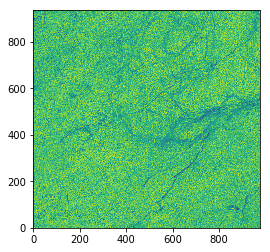

In [352]:
plt.imshow(im, extent=(0,974,0,935))

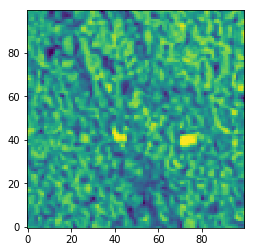

In [353]:
im_sub = im[300:400 , 300:400]
plt.imshow(im_sub)
plt.gca().invert_yaxis()

Generating random sampling points from the sub_image which is cut from the original image.

In [354]:
n_random_points = 100
np.random.seed (1357) 
y_max , x_max = im_sub.shape 
x_random = np.random.uniform (0 ,x_max , n_random_points) 
y_random = np.random.uniform (0 ,y_max , n_random_points ) 
training_vals = im_sub[ y_random.astype ('int') , x_random.astype ('int')]
print(training_vals)
print(im_sub.shape )


[184 253 170 167 192 166 175 211 185 199 218 243 179 170 174 199 200 185
 199 212 168 194 206 184 183 226 214 172 151 220 197 172 151 158 220 208
 217 185 205 206 218 198 206 165 206 181 204 224 202 233 213 192 229 193
 190 194 168 184 219 195 167 183 195 196 209 222 197 212 178 189 204 181
 231 201 194 211 182 177 216 203 187 173 198 164 165 154 229 182 182 158
 245 174 198 170 196 198 136 167 197 177]
(100, 100)


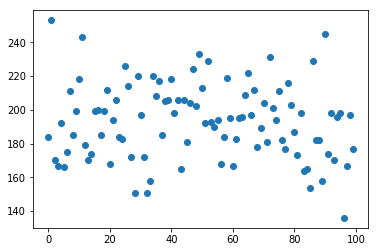

In [355]:
sample_points = plt.plot(training_vals, 'o')

In [356]:
def im_scattered(x = 0,y = 0):
    plt.figure('im_scattered', figsize=(6,6))
    plt.imshow(im_sub)
    plt.scatter(y_random.astype ('int') , x_random.astype ('int'), c='black')
    plt.gca().invert_yaxis()
  

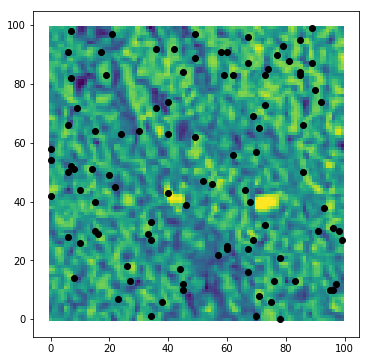

In [357]:
im_scattered()

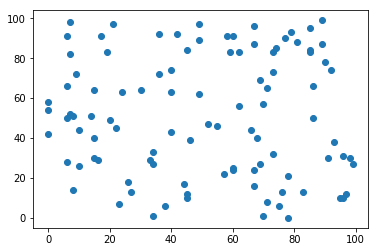

In [358]:
 plt.scatter(y_random.astype ('int') , x_random.astype ('int'))

# Performing a statistical analysis of the sampled points

193.3
22.249719099350447


(array([ 1.,  5., 12., 15., 17., 25., 10., 10.,  2.,  3.]),
 array([136. , 147.7, 159.4, 171.1, 182.8, 194.5, 206.2, 217.9, 229.6,
        241.3, 253. ]),
 <a list of 10 Patch objects>)

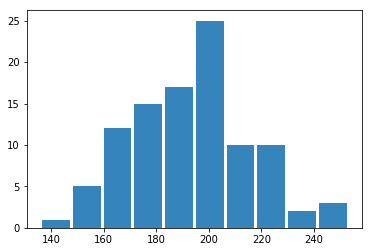

In [359]:
im_mean = np.mean(training_vals)
im_stdev = np.std(training_vals)
print(im_mean)
print(im_stdev)
plt.hist(training_vals,alpha=0.9, rwidth=0.9)

Text(0.5, 1.0, 'Normalized Histogram')

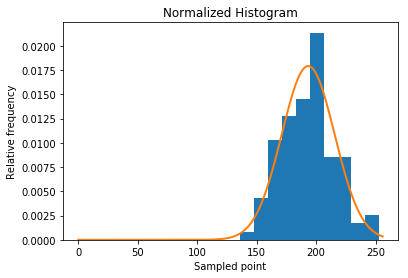

In [360]:
xvals=np.arange(0,256,0.1)
plt.hist(training_vals, normed=True)
plt.plot(xvals, scipy.stats.norm.pdf(xvals,im_mean, im_stdev), lw=2, label='normal distribution')
plt.xlabel("Sampled point") 
plt.ylabel("Relative frequency")
plt.title("Normalized Histogram")




from the histograms above it can be seen that the sampled point values are normally distributed so the mean and std-dev are reasonable choice 

Now generating a random image using mean and std dev of the sampled values

In [361]:
import scipy.stats
import scipy.spatial.distance as dist
im_rand = scipy.stats.norm.rvs(4,2, size = (2,3))
print(im_rand)

[[4.09311683 7.61116211 4.25154066]
 [3.67551883 4.61932769 3.57305365]]


In [362]:
im_rand = scipy.stats.norm.rvs(im_mean,im_stdev, size = im_sub.shape)

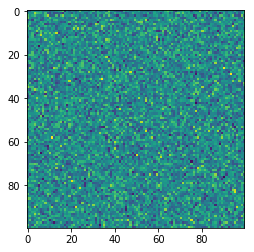

In [363]:
plt.imshow(im_rand)

Looking at the image its obvious that we see spatial variablility in it. we see higher spatial correlation of the green pixel values while yello pixel values have lesser spatial correlation

# Variogram modelling

In [364]:
#calculating lag-distance h and semivariance
n = len(training_vals)
h = np.ones([n,n])

for i in range(n):
    for j in range(n):
        h_ij= np.sqrt(((x_random[i]-x_random[j])**2)+((y_random[i]-y_random[j])**2))
        h[i,j]=h_ij
gamma= np.ones([n,n])

for i in range(n):
    for j in range(n):
        gamma_ij=(((training_vals[i]-training_vals[j])**2)/2)
        gamma[i,j] = gamma_ij

calculating mean-semivariance for each bin

In [365]:
h_max = (np.min(im_sub.shape)/2)
bins = np.arange(0, h_max, 1)
means=np.zeros([len(bins)-1])

for i in range(len(bins)-1):
    means[i] = np.nanmean(gamma[np.where((h>=bins[i]) * (h<=bins[i+1]))]) 
    
means[np.isnan(means)]=0

defining exponential and guassian function, but we still dont have values of range and sill

In [366]:
h_ran= np.arange(0,h_max, 0.5)
#defining a exponential variogram function
def expo_var(h_ran,C,r):
    Expo= C*(1-np.exp((-3*h_ran)/r))
    return Expo
#defining a gaussian variogram function
def gaus_var(h_ran,C,r):
    gaus= C*(1- np.exp(-3*(h_ran**2)/r**2))
    return gaus

getting values of range and sill using curve_fit from scipy 

In [367]:
#defining a spherical variogram function 
def spher_var(h_ran,C,r):
    if h_range <= r:
        spher=C*(((1.5* h_ran)/r)-((0.5*(h_ran**3))/r**3))
    else:
        spher= C
    return spher 
spher_function=np.vectorize(spher_var)
# now using curve_fit to get the values of range and sill from the exponential function
from scipy.optimize import curve_fit
cf= curve_fit(Exp_function, bins [: -1], means)
C_cal=cf[0][0]
r_cal=cf[0][1]
print('sill = %.2f' %(C_cal))
print('range = %.2f' %(r_cal))

sill = 494.29
range = 5.95


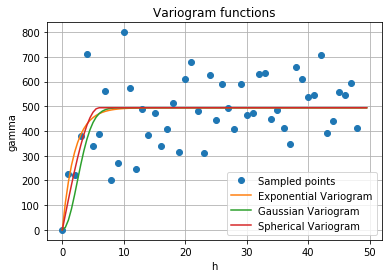

In [368]:
gamma_vs_h= plt.plot(bins[:-1],means,'o', label='Sampled points')
plt.grid()
plt.xlabel("h")
plt.ylabel("gamma")
plt.title("Variogram functions")
plt.plot(h_ran, expo_var(h_ran, C_cal, r_cal),'-', label='Exponential Variogram')
plt.plot(h_ran, gaus_var(h_ran, C_cal, r_cal),'-', label='Gaussian Variogram')
plt.plot(h_ran, sph_var(h_ran, C_cal, r_cal),'-', label='Spherical Variogram')
plt.legend()

# Simple krigging

first defining a meshgrid of equal size as the shape of the subimage in X-axis and Y-axis

In [369]:
x = np.arange(0, im_sub.shape[1], 1)
y = np.arange(0, im_sub.shape[0], 1)
X,Y = np.meshgrid(x, y)

now Definig a covariance function and then performing simple krigging,( krigging in 2d is a difficult one!!!!!!!.. it took my nights away)!!!!!!. but then some friends came to help!! :) 

In [370]:
def cof(h, sill = C_cal , ran = r_cal):
    Cf =  sill - (sill * (1 - np.exp((-3*h)/ran)))
    return Cf
def kriging(C, known_pos, training_vals, unknown_pos, mean_val, cof):
    known_pos=np.vstack([x_random, y_random]).transpose()
    mean_val=np.mean(training_vals)            
    c = np.zeros(len(known_pos))                       
    H = dist.cdist([unknown_pos], known_pos)[0] 
   

    for i in range(len(known_pos)):
        c[i] = cof(H[i])
    
    weight = np.linalg.solve(C,c)                          
    
    weight_2 = np.zeros(len(weight))                           
    for i in range(len(known_pos)):
        weight_2 [i] = weight[i] * ((training_vals[i] - mean_val))
    
    summ = 0.                                        
    for i in range(len(weight_2)):
        summ += weight_2 [i]
        
    est_val = mean_val + summ                        
    return est_val

Now finding out the krigging variance

In [371]:
def variance_func(known_pos):
    known_pos=np.vstack([x_random, y_random]).transpose()
    C = np.zeros([len(known_pos), len(known_pos)])     
    HC = dist.squareform(dist.pdist(known_pos))
    for i in range(len(known_pos)):
        for j in range(len(known_pos)):
            C[i,j] = cf(HC[i,j])
    return C

In [372]:
var_func = variance_func(known_pos)
Z = np.zeros([len(X),len(Y)])
for i in range(len(Z)):
    for j in range(len(Z)):
        Z[i,j]= kriging(var_func,known_pos, training_vals, np.array([range(len(Z))[i], range(len(Z))[j]]), mean_val, cf)

TypeError: 'tuple' object is not callable

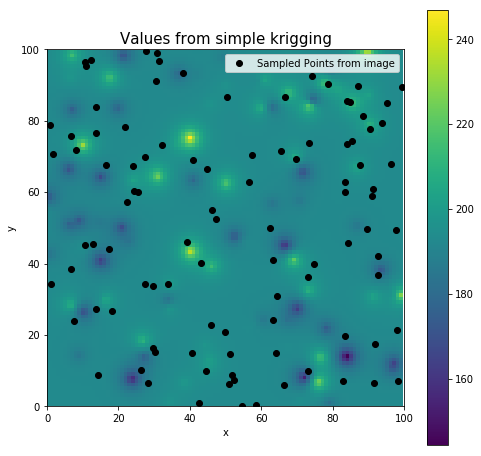

In [373]:
plt.figure(figsize=(8,8))
plt.plot(x_random, y_random, 'ko', label = 'Sampled Points from image')
plt.imshow(Z, cmap='viridis', origin='lower left')
plt.xlim((0, im_sub.shape[1]))
plt.ylim((0, im_sub.shape[0]))
plt.xlabel("x")
plt.ylabel("y") 
plt.title("Values from simple krigging", fontsize=15) 
plt.colorbar()
plt.legend()

# Sequential guassian simulation

 defining the random simulation positions..

(this section includes some code 
     which i got from "!!helpers!!" as my 2D.SGS just won't run without help.. untill right noww 22:30 (20th septemebr)                                                                                   

In [374]:

e=np.arange(0,im_sub.shape[1],1)
f=np.arange(0,im_sub.shape[0],1)
C,D=np.meshgrid(e,f)
k =np.vstack([C.ravel(), D.ravel()]).transpose()
np.random.seed(34567)
rnd_pos=np.random.permutation(k)
sgs_pos=rnd_pos[:99,:]
x_val=sgs_pos[:,0]
y_val=sgs_pos[:,1]

sgs_val=im_sub[y_val.astype('int'),x_val.astype('int')]

sim_pos=rnd_pos[100:,:]
x_spos=sim_pos[:,0]
y_spos=sim_pos[:,1]


Now performing krigging at each simulated position to get simulated values

In [375]:
def kriging(C, known_pos, training_vals, unknown_pos, mean_val, cof):
    known_pos=np.vstack([x_random, y_random]).transpose()
    mean_val=np.mean(training_vals)            
    c = np.zeros(len(known_pos))                       
    H = dist.cdist([unknown_pos], known_pos)[0] 
   

    for i in range(len(known_pos)):
        c[i] = cof(H[i])
    
    weight = np.linalg.solve(C,c)                          
    
    weight_2 = np.zeros(len(weight))                           
    for i in range(len(known_pos)):
        weight_2 [i] = weight[i] * ((training_vals[i] - mean_val))
    
    summ = 0.                                        
    for i in range(len(weight_2)):
        summ += weight_2 [i]
        
    est_val = mean_val + summ                        
    return est_val

for i in range(len(x_spos)):
    SGS_sim_pos = sim_pos [(i-1)]
    

    dist_SGS_sim_pos = dist.cdist([np.array(SGS_sim_pos)], sgs_pos)[0]
    r_0 = 10.
    ids = np.where(dist_SGS_sim_pos < r_0)
    n = 20
    ids_SGS = np.argsort(dist_SGS_sim_pos)
    neigh_ma = np.vstack([x_val[ids_SGS[:n]], 
                          y_val[ids_SGS[:n]]]).transpose()
    b=sgs_val[ids_SGS[:n]]
    SGS_mean = np.mean(b)
    SGS_var = variance_func(neigh_ma)
    
    SGS_kriging = simple_kriging(SGS_var, neigh_ma, b, SGS_sim_pos, SGS_mean, 
                                 cf)
    SGS_kriging_var = sill - (SGS_kriging - SGS_mean)
    
    sgs_val = np.append(sgs_val, SGS_kriging)
    x_val = np.append(x_val, SGS_sim_pos[0])
    y_val = np.append(y_val, SGS_sim_pos[1])
    neigh_ma = np.vstack([neigh_ma, SGS_sim_pos])

seq_gaus_sim = np.vstack([x_val, y_val]).transpose()

TypeError: 'tuple' object is not callable

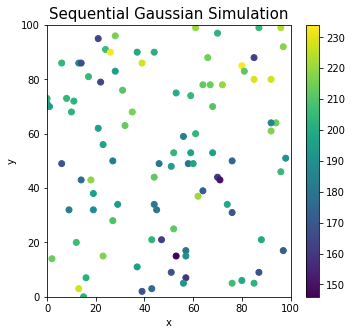

In [376]:
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121) 
ax1.set_title("Sequential Gaussian Simulation", fontsize=15) 
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_ylim(0,100)
ax1.set_xlim(0,100)
SGS_plot = ax1.scatter(x_training_vals, y_training_vals ,c=SGS_training_vals, cmap='viridis')
plt.colorbar(SGS_plot, ax=ax1)

# A brief description 

To perform a variability analysis on an image gotten from my petroleum geology field trip, The image was uploaded as an
intensity map . 
As the spatial variability or its inverse , the sparial correlation is not as much vissable in the big image, i have cut the image from pixel 300 to 400.
Then random points were selected from the image using the code provided in the document. I generated 100 points from the sub image, to decrese the run time of the codes and to keep as much data points as to get an good variogram model.
After this a statistical analysis of the image was done, at first, i calculated the mean and variance of the random sampled points and plotted them on a histogram to know weather they are distributed normally,, following the law of"large numbers".this is because if the distribution is normal distribution, it means that the sampled points/data are sufficient to view and calculate and analyze spatial variablility. Then a random image was generated on the basis of mean and stddev to confirm this. it can be seen that the random image shows a good variability. the green pixels show a very good correlation as well, while yello pixels dont show much correlation.
Now to quantify the spatial variablity we have to do a variogram analysis.First an experimental variogram has to be plotted, for which we need , average semivarince wrt to each bin, where bins are specific ranges of lag distances
First i calculated the semivariance and lag-distance. the lag distance shouldnt be too much becoz then it decreases the visibility of the experimental variogram
and then the range of lagdistance was kept to be half of the shape of the sub image .the bins are defined to get an average of semivariance from each bin, and also to get a good structure of the experimental variogram.
Then i defined the three predefined variogram functions, to fit on the experimental variogram. Now this gives a good visualization and quantification of spatial variability.
Next step is to use the geostatistical estimator called krigging and sequential guassian simulation to simulate values at the unknown points.
First a mesh difined which uses the same size as the subimage. The covariance function is defined keeping in count that stationarity holds allover the subimage. Then the simple krigging equations are used to calculate the value at unknown position.
The krigging at an unknown point gives us the mean value out of a normal distribution of values of random variable.. but this leads to anit of biasness in our spatial interpolation, So we use Sequential Guassian Simulation, and perform krigging at all the points in the meshgrid which is defined , this gives us the krigging value which forms a normal distribution that can be found ou usint the mean and standard deviation of the value, and then we take out a random value from the normal distribution of the krigging value and add it to the grid and the simulation is run again untill all the points are simulated. 
(Unfortunately my simulation is not running, even though i tried it lots of times myself and also with the help of some of my coalleagues).

